In [1]:
#Import dependants
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import us
from pathlib import Path
from datetime import datetime

(to find the full names of the states for shd_df, I had to import "us". To do this, type "pip install us" on a random cell, once installed, delete and then restart kernel to use)

# Data Cleaning
### Preparing for Analysis

In [2]:
CSV1Kpath = Path("Resources/Kaggle1DS.csv")
CSV2Kpath = Path("Resources/Kaggle2DS.csv")
CSV3Xpath = Path("Resources/SHD.csv")
CSV1KR = pd.read_csv(CSV1Kpath)
CSV2KR = pd.read_csv(CSV2Kpath)
CSV3XR = pd.read_csv(CSV3Xpath)

In [3]:
#Data frames
kaggle_1_df = pd.DataFrame(CSV1KR)
kaggle_2_df = pd.DataFrame(CSV2KR)
shd_df = pd.DataFrame(CSV3XR)

### Cleaning Kaggle 1 df

In [4]:
#kaggle_1_df

In [5]:
# Organizing columns in desired order #update: took out address
clean_1_df = pd.DataFrame(kaggle_1_df[["school","type","year","date","time","city","state","urbanrural","race","killed","injured","victims","LONCOD","LATCOD"]])

# Convert "Date" column to datetime
clean_1_df["date"] = pd.to_datetime(clean_1_df["date"])

# Format the 'Date' column for display
clean_1_df["date"] = clean_1_df["date"].dt.strftime('%m/%d/%Y')

# Renaming the columns
clean_1_df.rename(columns={"urbanrural": "City Type", "LONCOD": "Longitude","LATCOD": "Latitude"}, inplace=True)

# Proper case the columns
clean_1_df.columns = [col.title() if col.islower() else col for col in clean_1_df]

# Proper case the rows
clean_1_df = clean_1_df.map(lambda x: x.title() if isinstance(x, str) else x)

# Replace NaN with "Unknown"
clean_1_df = clean_1_df.fillna("Unknown")


# Adding the newly labeled data into a new csv for cleanliness
clean_1_path = Path("Outputs/clean_1_final.csv")
clean_1_df.to_csv(clean_1_path, index=False)

clean_1_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14312\3454511816.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clean_1_df["date"] = pd.to_datetime(clean_1_df["date"])


,School,Type,Year,Date,Time,City,State,City Type,Race,Killed,Injured,Victims,Longitude,Latitude
0,William Penn High School,High School,2009,01/08/2009,8:30Pm,New Castle,Delaware,Suburbtown,Black,0,1,1,-75.5849,39.6681
1,Dunbar Vocational Career Academy,High School,2009,01/09/2009,8:00Pm,Chicago,Illinois,Urban,Black,0,5,5,-87.6175,41.8399
2,Cahokia High School,High School,2009,01/23/2009,7:20Pm,Cahokia,Illinois,Suburbtown,Black,1,0,1,-90.1651,38.5657
3,Zebulon Middle School,Middle School,2009,02/11/2009,6:00Am,Zebulon,North Carolina,Suburbtown,Black,0,1,1,-78.3118,35.8315
4,Central High School,High School,2009,02/17/2009,2:20Pm,Detroit,Michigan,Urban,Unknown,0,1,1,-83.113977,42.383593


In [6]:
# Load the dataset as a DataFrame
clean_2_df = pd.DataFrame(kaggle_2_df)

# Added a "Victims" column to match other datasets for easier merging
clean_2_df["Victims"] = clean_2_df["killed"] + clean_2_df["injured"]

# Organizing available columns in desired order
reorganized_clean_2_df = clean_2_df[["school","year","date","time","city","state","killed","injured", "Victims", "long","lat","weapon",
                                       "weapon_source","age_shooter1","gender_shooter1","race_ethnicity_shooter1","shooter_relationship1"]]

# Convert "Date" column to datetime
reorganized_clean_2_df["date"] = pd.to_datetime(reorganized_clean_2_df["date"])

# Format the 'Date' column for display
reorganized_clean_2_df["date"] = reorganized_clean_2_df["date"].dt.strftime("%m/%d/%Y")

# Renaming the columns
reorganized_clean_2_df.rename(columns={"long": "Longitude","lat": "Latitude","weapon_source":"Weapon Source", "age_shooter1":"Age",
                           "race_ethnicity_shooter1":"Race",}, inplace=True)

# Proper case the columns
reorganized_clean_2_df.columns = [col.title() if col.islower() else col for col in reorganized_clean_2_df]

# Proper case the rows
reorganized_clean_2_df = reorganized_clean_2_df.map(lambda x: x.title() if isinstance(x, str) else x)

# Extract school type from the 'School' column and put it in the 'Type' column
reorganized_clean_2_df.loc[reorganized_clean_2_df["School"].str.contains("High School", case=False, na=False), "Type"] = "High School"
reorganized_clean_2_df.loc[reorganized_clean_2_df["School"].str.contains("Middle School", case=False, na=False), "Type"] = "Middle School"
reorganized_clean_2_df.loc[reorganized_clean_2_df["School"].str.contains("Elementary School", case=False, na=False), "Type"] = "Elementary School"
reorganized_clean_2_df.loc[reorganized_clean_2_df["School"].str.contains("Junior High", case=False, na=False), "Type"] = "Middle School"

# Rearranging new columns and the first dataframe into desired order
reorganized_clean_2_df = pd.DataFrame(reorganized_clean_2_df[["School","Type","Year","Date","Time","City","State","Race","Killed","Injured", "Victims",
                                     "Longitude","Latitude",
                                      "Weapon","Weapon Source","Age","Gender_Shooter1","Shooter_Relationship1"]])

# Replace NaN with "Unknown"
reorganized_clean_2_df = reorganized_clean_2_df.fillna("Unknown")

# Adding the newly labeled data into a new csv for cleanliness
clean_2_path = Path("Outputs/clean_2_final.csv")
reorganized_clean_2_df.to_csv(clean_2_path, index=False)

reorganized_clean_2_df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_14312\3750166570.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reorganized_clean_2_df["date"] = pd.to_datetime(reorganized_clean_2_df["date"])
C:\Users\user\AppData\Local\Temp\ipykernel_14312\3750166570.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reorganized_clean_2_df["date"] = reorganized_clean_2_df["date"].dt.strftime("%m/%d/%Y")
C:\Users\user\AppData\Local\Temp\ipykernel_14312\3750166570.py:18: SettingWithCopyWarning: 
A value is trying to be se

,School,Type,Year,Date,Time,City,State,Race,Killed,Injured,Victims,Longitude,Latitude,Weapon,Weapon Source,Age,Gender_Shooter1,Shooter_Relationship1
0,Columbine High School,High School,1999,04/20/1999,11:19 Am,Littleton,Colorado,W,13,21,34,-105.075,39.60391,12-Gauge Savage-Springfield 67H Pump-Action Sh...,Purchased From Friends,18.0,M,Student
1,Scotlandville Middle School,Middle School,1999,04/22/1999,12:30 Pm,Baton Rouge,Louisiana,Unknown,0,1,1,-91.169966,30.529958,.22 Caliber Pistol,Unknown,14.0,M,Former Student (Expelled)
2,Heritage High School,High School,1999,05/20/1999,8:03 Am,Conyers,Georgia,W,0,6,6,-84.04796,33.626922,".22 Caliber Rifle, 357-Caliber Magnum Handgun",Unknown,15.0,M,Student
3,John Bartram High School,High School,1999,10/04/1999,10:00 Am,Philadelphia,Pennsylvania,Unknown,0,1,1,-75.234108,39.921509,Rg .25-Caliber Pistol,Purchased From Friend,17.0,M,Student
4,Dorchester High School,High School,1999,11/03/1999,7:40 Am,Boston,Massachusetts,Unknown,0,1,1,-71.075901,42.285268,Unknown,Unknown,Unknown,M,Unknown


### Cleaning shd_df

In [7]:
shd_df

,Incident_ID,Date,Quarter,school,City,State,School_Level,Location,During_School,Time_Period,First_Shot,Bullied,Domestic_Violence,Gang_Related,Preplanned
0,19700105DCHIW,1970-01-05,Winter,Hine Junior High School,Washington,DC,High,Inside School Building,Yes,NaN,NaN,No,No,No,No
1,19700105DCSOW,1970-01-05,Winter,Sousa Junior High,Washington,DC,Junior High,Hallway,Yes,NaN,NaN,No,No,No,No
2,19700105DCUNW,1970-01-05,Winter,Unnamed High School,Washington,DC,High,Playground,Yes,NaN,NaN,No,No,No,No
3,19700206OHJOC,1970-02-06,Winter,John F. Kennedy High School,Cleveland,OH,High,Hallway,Yes,NaN,NaN,No,No,No,No
4,19700323CADAL,1970-03-23,Spring,David Starr Jordan High School,Long Beach,CA,High,Beside Building,No,Night,NaN,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,20220608ARLIL,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,Other,School Bus,Yes,Dismissal,16:01:00,No,No,NaN,No
2065,20220609ALWAG,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,Elementary,Front of School,Yes,Morning Classes,09:30:00,NaN,NaN,NaN,NaN
2066,20220610ALBYB,2022-06-10,Summer,Byhalia High School,Byhalia,MS,High,Parking Lot,Yes,Morning Classes,10:30:00,No,No,NaN,No
2067,20220613WAMAE,2022-06-13,Summer,Mariner High School,Everett,WA,High,Parking Lot,No,After School,15:10:00,No,No,NaN,No


In [8]:
# Organizing available columns in desired order
clean_3_df = pd.DataFrame(shd_df[["school","School_Level","Date","City","State","First_Shot","Bullied","Domestic_Violence","Gang_Related","Preplanned","Quarter","Location"]])

# Convert "Date" column to datetime
clean_3_df["Date"] = pd.to_datetime(clean_3_df["Date"])

# Create the "Year" column by extracting the year from the "Date" column
clean_3_df['Year'] = clean_3_df['Date'].dt.year

# Format the 'Date' column for display
clean_3_df["Date"] = clean_3_df["Date"].dt.strftime('%m/%d/%Y')

# Renaming the columns
clean_3_df.rename(columns={"school":"School", "School_Level": "Type","First_Shot": "Time"}, inplace=True)

# Proper case the columns
clean_3_df.columns = [col.title() if col.islower() else col for col in clean_3_df]

#"weapon", "weapon_source","age_shooter1","gender_shooter1","race_ethnicity_shooter1","shooter_relationship1"

# Extract school type from the 'School' column and put it in the 'Type' column
clean_3_df.loc[clean_3_df["School"].str.contains("High School", case=False, na=False), "Type"] = "High School"
clean_3_df.loc[clean_3_df["School"].str.contains("Middle School", case=False, na=False), "Type"] = "Middle School"
clean_3_df.loc[clean_3_df["School"].str.contains("Elementary School", case=False, na=False), "Type"] = "Elementary School"
clean_3_df.loc[clean_3_df["School"].str.contains("Junior High", case=False, na=False), "Type"] = "Middle School"

# Map state abbreviations to full state names using us package
def get_full_state_name(abbrev):
    try:
        return us.states.lookup(abbrev).name
    except AttributeError:
        return abbrev

clean_3_df["State"] = clean_3_df["State"].apply(get_full_state_name)

# Rearranging new columns and the first dataframe into desired order
clean_3_df = pd.DataFrame(clean_3_df[["School","Type","Date","City","State","Time","Bullied","Domestic_Violence","Gang_Related","Preplanned","Quarter","Location"]])

# Replace NaN with "Unknown"
clean_3_df = clean_3_df.fillna("Unknown")

# Adding the newly labeled data into a new csv for cleanliness
clean_3_path = Path("Outputs/clean_3_final.csv")
clean_3_df.to_csv(clean_3_path, index=False)

clean_3_df.head()

,School,Type,Date,City,State,Time,Bullied,Domestic_Violence,Gang_Related,Preplanned,Quarter,Location
0,Hine Junior High School,Middle School,01/05/1970,Washington,DC,Unknown,No,No,No,No,Winter,Inside School Building
1,Sousa Junior High,Middle School,01/05/1970,Washington,DC,Unknown,No,No,No,No,Winter,Hallway
2,Unnamed High School,High School,01/05/1970,Washington,DC,Unknown,No,No,No,No,Winter,Playground
3,John F. Kennedy High School,High School,02/06/1970,Cleveland,Ohio,Unknown,No,No,No,No,Winter,Hallway
4,David Starr Jordan High School,High School,03/23/1970,Long Beach,California,Unknown,No,No,No,No,Spring,Beside Building


### Merging Data Frames

drop: "Type_x","Year_x","Date_x","Time_x","City_x","State_x"

In [9]:
# Merging First dfs
merged_df = pd.merge(clean_1_df, reorganized_clean_2_df, on=["School","Race", "Killed", "Injured", "Victims", "Longitude", "Latitude"], how="right") 
clean_merge_df = merged_df.drop(["Type_x","Year_x","Date_x","Time_x","City_x","State_x"],axis = 1)

# Renaming City for final merge
clean_merge_df.rename(columns={"City_y": "City","Type_y": "Type","Year_y":"Year","Date_y":"Date","Time_y":"Time","State_y":"State"}, inplace=True)

clean_merge_df.columns

Index(['School', 'City Type', 'Race', 'Killed', 'Injured', 'Victims',
       'Longitude', 'Latitude', 'Type', 'Year', 'Date', 'Time', 'City',
       'State', 'Weapon', 'Weapon Source', 'Age', 'Gender_Shooter1',
       'Shooter_Relationship1'],
      dtype='object')

drop: "City Type", "Victims","Type_x","Date_x","State_y","Time_x"

In [10]:
# Final Merge
final_df = pd.merge(clean_merge_df, clean_3_df, on=["School","City"])
final_df_merged = final_df.drop(["City Type","Type_x","Date_x","State_y","Time_x"],axis = 1)

# Renaming City for final merge
final_df_merged.rename(columns={"Type_y": "Type","Date_y": "Date","Time_y":"Time","State_x":"State"}, inplace=True)

# Dropping duplicates in our final DataFrame
clean_final_merge = final_df_merged.drop_duplicates(subset="Date")

# Adding the newly labeled data into a new CSV for easier access and analysis
final_path = Path("Outputs/Clean_Final_Data.csv")
clean_final_merge.to_csv(final_path, index=False)

# Display Final Dataframe
clean_final_merge.head()

,School,Race,Killed,Injured,Victims,Longitude,Latitude,Year,City,State,...,Shooter_Relationship1,Type,Date,Time,Bullied,Domestic_Violence,Gang_Related,Preplanned,Quarter,Location
0,Columbine High School,W,13,21,34,-105.075,39.60391,1999,Littleton,Colorado,...,Student,High School,04/20/1999,11:19 AM,Yes,No,No,Yes,Spring,Cafeteria
1,Scotlandville Middle School,Unknown,0,1,1,-91.169966,30.529958,1999,Baton Rouge,Louisiana,...,Former Student (Expelled),Middle School,04/22/1999,12:30 PM,No,No,No,No,Spring,Beside Building
2,Heritage High School,W,0,6,6,-84.04796,33.626922,1999,Conyers,Georgia,...,Student,High School,05/20/1999,8:03 AM,No,No,No,Yes,Spring,Hallway
3,Deming Middle School,H,1,0,1,-107.762986,32.261547,1999,Deming,New Mexico,...,Student,Middle School,11/19/1999,12:45 PM,No,No,No,No,Fall,Outside on School Property
4,Fort Gibson Middle School,Ai,0,5,5,-95.241921,35.795556,1999,Fort Gibson,Oklahoma,...,Student,Middle School,12/06/1999,7:45 AM,No,No,No,No,Winter,Front of School


# Analyzing the Data

In [11]:
# Annual analysis of # of incidents by year
year_school_df = clean_final_merge.groupby("Year")

#Count of incidents per year
count_year_incident = year_school_df['Year'].count()

count_year_incident

Year
1999     5
2000    10
2001    12
2002     6
2003     9
2004     9
2005    15
2006    15
2007     6
2008     9
2009    12
2010     9
2011     4
2012    10
2013    12
2014    13
2015     5
2016    10
2017    14
2018    24
2019    20
2020     5
2021    29
2022    22
2023     7
Name: Year, dtype: int64

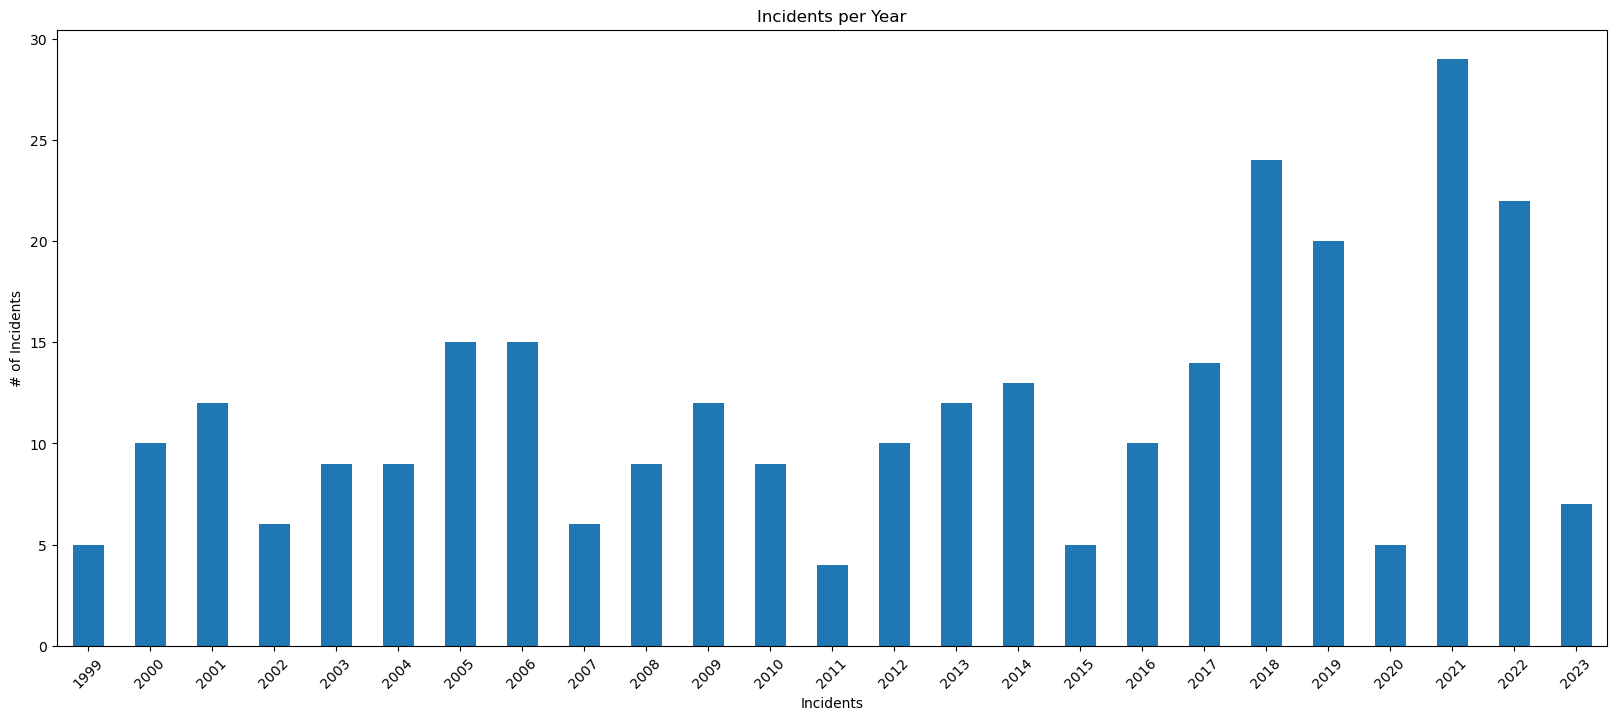

In [12]:
# Create a bar chart
annual_chart = count_year_incident.plot(kind="bar", figsize=(20,8))

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.xlabel("Incidents")
plt.ylabel("# of Incidents")
plt.title("Incidents per Year")

plt.show()

Top Five States with the Most School Shootings:
State
California        30
Texas             22
Florida           20
North Carolina    16
Michigan          16
Name: count, dtype: int64


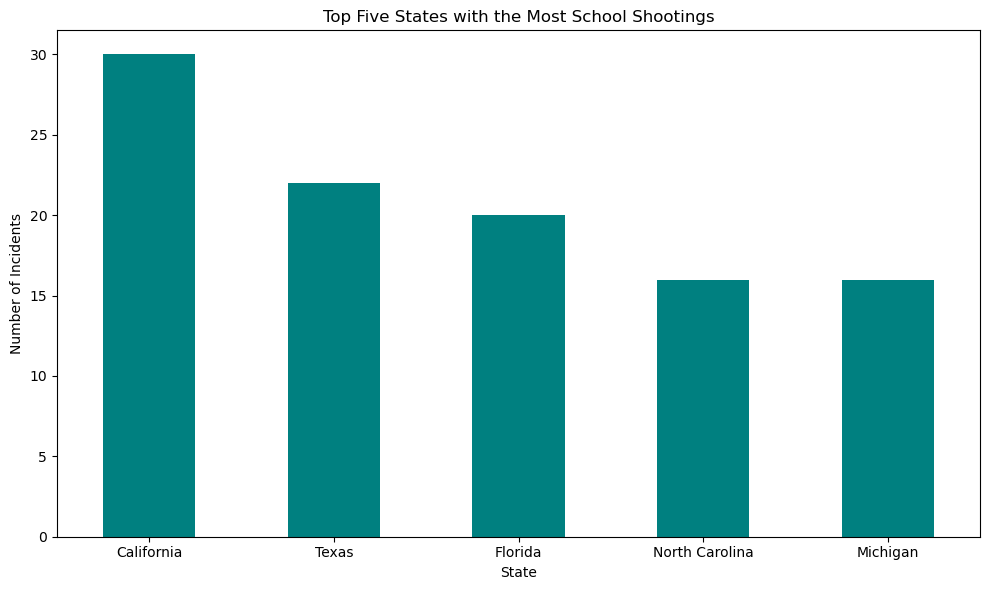

<Figure size 640x480 with 0 Axes>

In [15]:
# Count the number of incidents by state
state_counts = clean_final_merge['State'].value_counts().sort_values(ascending=False)

# Get the top five states
top_five_states = state_counts.head(5)

# Print the top five states
print("Top Five States with the Most School Shootings:")
print(top_five_states)

# Plot the top five states
plt.figure(figsize=(10, 6))
top_five_states.plot(kind='bar', color='teal')
plt.title('Top Five States with the Most School Shootings')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.tight_layout()

# Output the Graph
plt.savefig("Outputs/top_5_states")

plt.show()


